In [10]:
pwd


'C:\\Users\\SOUHA'

In [11]:
import numpy as np
import pandas as pd 
import seaborn as sns 
import statsmodels.api as sn

In [12]:
import firebase_admin
from firebase_admin import credentials, db
import pandas as pd




In [13]:
# Initialiser l'application Firebase
cred = credentials.Certificate('D:\\souha\\credentials.json')
firebase_admin.initialize_app(cred, {
    'databaseURL': 'https://nosqlpython-default-rtdb.firebaseio.com/'
})

# Référence à la base de données
ref = db.reference('path/to/your/data')

# Lire les données
data = ref.get()

# Convertir les données en DataFrame pandas
df = pd.DataFrame(data)

In [14]:

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [106]:
df = pd.read_csv('D:\\souha\\modelhumidité (1).csv', encoding='latin1')

In [16]:
print(df.dtypes)

Time (hours)                 float64
Humidity Level 1 (%)         float64
Humidity Level 2 (%)         float64
Humidity Level 3 (%)         float64
Temperature Level 1 (Â°C)    float64
Temperature Level 2 (Â°C)    float64
Temperature Level 3 (Â°C)    float64
Water Quantity (L)           float64
dtype: object


In [17]:
df

,Time (hours),Humidity Level 1 (%),Humidity Level 2 (%),Humidity Level 3 (%),Temperature Level 1 (Â°C),Temperature Level 2 (Â°C),Temperature Level 3 (Â°C),Water Quantity (L)
0,0.0,80.0,30.0,20.0,25.0,24.0,23.0,40.0
1,12.0,70.0,40.0,30.0,28.0,27.0,26.0,40.0
2,24.0,60.0,50.0,40.0,30.0,29.0,28.0,40.0
3,36.0,50.0,55.0,45.0,27.0,26.0,25.0,40.0
4,48.0,40.0,60.0,50.0,20.0,21.0,22.0,40.0
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,0.0,80.0,30.0,20.0,25.0,24.0,23.0,40.0
7,12.0,70.0,40.0,30.0,28.0,27.0,26.0,40.0
8,24.0,60.0,50.0,40.0,30.0,29.0,28.0,40.0
9,36.0,50.0,55.0,45.0,27.0,26.0,25.0,40.0


In [18]:
df.shape

(17, 8)

In [19]:
df.describe()

,Time (hours),Humidity Level 1 (%),Humidity Level 2 (%),Humidity Level 3 (%),Temperature Level 1 (Â°C),Temperature Level 2 (Â°C),Temperature Level 3 (Â°C),Water Quantity (L)
count,15.000000,15.000000,15.00000,15.00000,15.000000,15.000000,15.000000,15.000000
mean,32.000000,60.000000,47.00000,37.00000,21.400000,20.666667,19.933333,36.666667
std,27.464262,14.638501,11.14835,11.14835,7.365945,7.345228,7.391759,4.879500
min,0.000000,40.000000,30.00000,20.00000,10.000000,9.000000,8.000000,30.000000
25%,12.000000,50.000000,40.00000,30.00000,13.500000,12.500000,11.500000,30.000000
50%,24.000000,60.000000,50.00000,40.00000,25.000000,24.000000,23.000000,40.000000
75%,48.000000,70.000000,55.00000,45.00000,27.500000,26.500000,25.500000,40.000000
max,96.000000,80.000000,60.00000,50.00000,30.000000,29.000000,28.000000,40.000000


In [20]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Time (hours)               15 non-null     float64
 1   Humidity Level 1 (%)       15 non-null     float64
 2   Humidity Level 2 (%)       15 non-null     float64
 3   Humidity Level 3 (%)       15 non-null     float64
 4   Temperature Level 1 (Â°C)  15 non-null     float64
 5   Temperature Level 2 (Â°C)  15 non-null     float64
 6   Temperature Level 3 (Â°C)  15 non-null     float64
 7   Water Quantity (L)         15 non-null     float64
dtypes: float64(8)
memory usage: 1.2 KB


In [21]:
num=df.select_dtypes(include =['int64','float64']).columns
cat=df.select_dtypes(include ='object').columns

In [22]:
df.isnull()

,Time (hours),Humidity Level 1 (%),Humidity Level 2 (%),Humidity Level 3 (%),Temperature Level 1 (Â°C),Temperature Level 2 (Â°C),Temperature Level 3 (Â°C),Water Quantity (L)
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
5,True,True,True,True,True,True,True,True
6,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False


In [23]:
# Vérification des données manquantes
print(df.isnull().sum())

Time (hours)                 2
Humidity Level 1 (%)         2
Humidity Level 2 (%)         2
Humidity Level 3 (%)         2
Temperature Level 1 (Â°C)    2
Temperature Level 2 (Â°C)    2
Temperature Level 3 (Â°C)    2
Water Quantity (L)           2
dtype: int64


In [24]:
print(df.columns)

Index(['Time (hours)', 'Humidity Level 1 (%)', 'Humidity Level 2 (%)',
       'Humidity Level 3 (%)', 'Temperature Level 1 (Â°C)',
       'Temperature Level 2 (Â°C)', 'Temperature Level 3 (Â°C)',
       'Water Quantity (L)'],
      dtype='object')


In [25]:
# Suppression des lignes avec des valeurs manquantes
df.dropna(inplace=True)


In [26]:
# Vérification des données manquantes
print(df.isnull().sum())

Time (hours)                 0
Humidity Level 1 (%)         0
Humidity Level 2 (%)         0
Humidity Level 3 (%)         0
Temperature Level 1 (Â°C)    0
Temperature Level 2 (Â°C)    0
Temperature Level 3 (Â°C)    0
Water Quantity (L)           0
dtype: int64


In [27]:
from sklearn.preprocessing import LabelEncoder
scale = LabelEncoder()

In [28]:
#prépare les données de la colonne df[i] en ajustant un scaler approprié aux données 
for i in cat :
    df[i]=scale.fit_transform(df[i])

In [29]:
df.head()

,Time (hours),Humidity Level 1 (%),Humidity Level 2 (%),Humidity Level 3 (%),Temperature Level 1 (Â°C),Temperature Level 2 (Â°C),Temperature Level 3 (Â°C),Water Quantity (L)
0,0.0,80.0,30.0,20.0,25.0,24.0,23.0,40.0
1,12.0,70.0,40.0,30.0,28.0,27.0,26.0,40.0
2,24.0,60.0,50.0,40.0,30.0,29.0,28.0,40.0
3,36.0,50.0,55.0,45.0,27.0,26.0,25.0,40.0
4,48.0,40.0,60.0,50.0,20.0,21.0,22.0,40.0


In [30]:
x_multi =df.drop("Water Quantity (L)",axis=1)

In [31]:
x_multi.head(12)

,Time (hours),Humidity Level 1 (%),Humidity Level 2 (%),Humidity Level 3 (%),Temperature Level 1 (Â°C),Temperature Level 2 (Â°C),Temperature Level 3 (Â°C)
0,0.0,80.0,30.0,20.0,25.0,24.0,23.0
1,12.0,70.0,40.0,30.0,28.0,27.0,26.0
2,24.0,60.0,50.0,40.0,30.0,29.0,28.0
3,36.0,50.0,55.0,45.0,27.0,26.0,25.0
4,48.0,40.0,60.0,50.0,20.0,21.0,22.0
6,0.0,80.0,30.0,20.0,25.0,24.0,23.0
7,12.0,70.0,40.0,30.0,28.0,27.0,26.0
8,24.0,60.0,50.0,40.0,30.0,29.0,28.0
9,36.0,50.0,55.0,45.0,27.0,26.0,25.0
10,48.0,40.0,60.0,50.0,20.0,21.0,22.0


In [32]:
y_multi=df['Water Quantity (L)']

In [33]:
y_multi.head()

0    40.0
1    40.0
2    40.0
3    40.0
4    40.0
Name: Water Quantity (L), dtype: float64

In [34]:
x_multi_cons=sn.add_constant(x_multi)

In [35]:
x_multi_cons.head()


,const,Time (hours),Humidity Level 1 (%),Humidity Level 2 (%),Humidity Level 3 (%),Temperature Level 1 (Â°C),Temperature Level 2 (Â°C),Temperature Level 3 (Â°C)
0,1.0,0.0,80.0,30.0,20.0,25.0,24.0,23.0
1,1.0,12.0,70.0,40.0,30.0,28.0,27.0,26.0
2,1.0,24.0,60.0,50.0,40.0,30.0,29.0,28.0
3,1.0,36.0,50.0,55.0,45.0,27.0,26.0,25.0
4,1.0,48.0,40.0,60.0,50.0,20.0,21.0,22.0


In [36]:
Lm_multi= sn.OLS(y_multi,x_multi_cons).fit()

In [37]:
Lm_multi.summary()

C:\Users\SOUHA\anaconda3\Lib\site-packages\scipy\stats\_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     Water Quantity (L)   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                     584.0
Date:                Mon, 22 Jul 2024   Prob (F-statistic):           5.09e-11
Time:                        09:36:34   Log-Likelihood:                -1.1531
No. Observations:                  15   AIC:                             14.31
Df Residuals:                       9   BIC:                             18.55
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                         1.4530      0.114     12.782      0.000       1.196       1.710
Time (hours)                 -0.0315      0.013     -2.478      0.035      -0.060      -0.003
Humidity Level 1 (%)         -0.4389      0.056     -7.814      0.000      -0.566      -0.312
Humidity Level 2 (%)          7.0005      0.541     12.937      0.000       5.776       8.225
Humidity Level 3 (%)         -7.5290      0.596    -12.637      0.000      -8.877      -6.181
Temperature Level 1 (Â°C)    -0.2901      0.123     -2.358      0.043      -0.568      -0.012
Temperature Level 2 (Â°C)     0.2069      0.007     29.782      0.000       0.191       0.223
Temperature Level 3 (Â°C)     0.7040      0.129      5.470      0.000       0.413       0.995
==============================================================================
Omnibus:                        3.664   Durbin-Watson:                   2.108
Prob(Omnibus):                  0.160   Jarque-Bera (JB):                1.260
Skew:                           0.143   Prob(JB):                        0.533
Kurtosis:                       1.609   Cond. No.                     2.47e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.35e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [38]:
Lm3= LinearRegression()

In [39]:
Lm3.fit(x_multi,y_multi)

LinearRegression()

In [40]:
print(Lm3.intercept_,Lm3.coef_)

74.10049772698645 [-0.03150474 -0.43886224 -0.26422655 -0.26422655 -0.29011614  0.20693703
  0.7039902 ]


In [41]:
X_train, X_test, y_train, y_test = train_test_split(x_multi, y_multi, test_size=0.2, random_state=0)

In [42]:
pred=Lm3.predict(x_multi)
print("Predictions:", pred)

Predictions: [39.68555154 40.27401937 40.2416761  39.74754281 40.         39.68555154
 40.27401937 40.2416761  39.74754281 40.         30.37338508 29.96298492
 29.55258477 29.92201678 30.2914488 ]


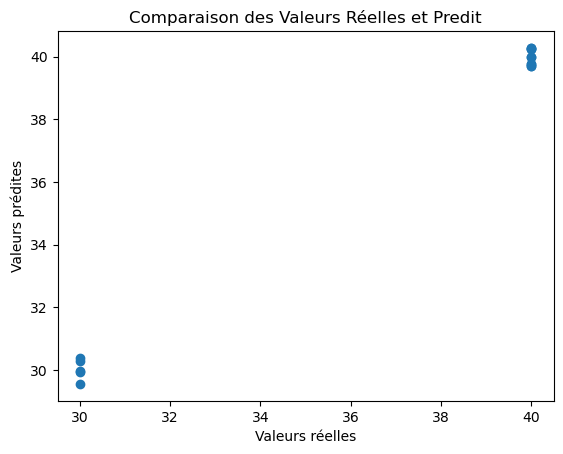

In [43]:
import matplotlib.pyplot as plt

# Comparaison des valeurs réelles et prédites
plt.scatter(y_multi, pred)
plt.xlabel('Valeurs réelles')
plt.ylabel('Valeurs prédites')
plt.title('Comparaison des Valeurs Réelles et Predit')
plt.show()


In [44]:
print( X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(12, 7) (3, 7) (12,) (3,)


In [45]:
Lm_a= LinearRegression()

In [46]:
Lm_a.fit(X_train,y_train)

LinearRegression()

In [47]:
y_test_a=Lm_a.predict(X_test)

In [48]:
Y_train_a=Lm_a.predict(X_train)

In [49]:
from sklearn.metrics import r2_score

In [50]:
r2_score(y_test,y_test_a)

0.0

In [51]:
r2_score(y_train,Y_train_a)

0.997612652939421

In [52]:
print(df.columns)


Index(['Time (hours)', 'Humidity Level 1 (%)', 'Humidity Level 2 (%)',
       'Humidity Level 3 (%)', 'Temperature Level 1 (Â°C)',
       'Temperature Level 2 (Â°C)', 'Temperature Level 3 (Â°C)',
       'Water Quantity (L)'],
      dtype='object')


In [53]:
from sklearn import preprocessing

In [54]:
scaler = preprocessing.StandardScaler().fit(X_train)

In [55]:
X_train_s= scaler.transform(X_train)

In [56]:
X_test_s= scaler.transform(X_test)

In [57]:
from sklearn.linear_model import Ridge   #on va maintenant utiliser Ridge 

In [58]:
Lm_r= Ridge(alpha=0.5)
Lm_r.fit(X_train_s,y_train)

Ridge(alpha=0.5)

In [59]:
r2_score(y_test,Lm_r.predict(X_test_s))

0.0

In [60]:
from sklearn.model_selection import validation_curve

In [61]:
validation_curve?

Signature:
validation_curve(
    estimator,
    X,
    y,
    *,
    param_name,
    param_range,
    groups=None,
    cv=None,
    scoring=None,
    n_jobs=None,
    pre_dispatch='all',
    verbose=0,
    error_score=nan,
    fit_params=None,
)
Docstring:
Validation curve.

Determine training and test scores for varying parameter values.

Compute scores for an estimator with different values of a specified
parameter. This is similar to grid search with one parameter. However, this
will also compute training scores and is merely a utility for plotting the
results.

Read more in the :ref:`User Guide <validation_curve>`.

Parameters
----------
estimator : object type that implements the "fit" and "predict" methods
    An object of that type which is cloned for each validation.

X : array-like of shape (n_samples, n_features)
    Training vector, where `n_samples` is the number of samples and
    `n_features` is the number of features.

y : array-like of shape (n_samples,) or (n_samples, 

In [62]:
# we will be choosing the best lambda value form our model
param_range = np.logspace(-2,8,100) #will create hundred values between 10exp-2 and 10exp 8 


In [63]:
param_range

array([1.00000000e-02, 1.26185688e-02, 1.59228279e-02, 2.00923300e-02,
       2.53536449e-02, 3.19926714e-02, 4.03701726e-02, 5.09413801e-02,
       6.42807312e-02, 8.11130831e-02, 1.02353102e-01, 1.29154967e-01,
       1.62975083e-01, 2.05651231e-01, 2.59502421e-01, 3.27454916e-01,
       4.13201240e-01, 5.21400829e-01, 6.57933225e-01, 8.30217568e-01,
       1.04761575e+00, 1.32194115e+00, 1.66810054e+00, 2.10490414e+00,
       2.65608778e+00, 3.35160265e+00, 4.22924287e+00, 5.33669923e+00,
       6.73415066e+00, 8.49753436e+00, 1.07226722e+01, 1.35304777e+01,
       1.70735265e+01, 2.15443469e+01, 2.71858824e+01, 3.43046929e+01,
       4.32876128e+01, 5.46227722e+01, 6.89261210e+01, 8.69749003e+01,
       1.09749877e+02, 1.38488637e+02, 1.74752840e+02, 2.20513074e+02,
       2.78255940e+02, 3.51119173e+02, 4.43062146e+02, 5.59081018e+02,
       7.05480231e+02, 8.90215085e+02, 1.12332403e+03, 1.41747416e+03,
       1.78864953e+03, 2.25701972e+03, 2.84803587e+03, 3.59381366e+03,
      

In [64]:
train_scores, test_scores = validation_curve(
    Ridge(),                # The model
    X_train_s,                # Features
    y_train,                # Target
    param_name="alpha",     # The parameter to vary
    param_range=param_range,  # The range of parameter values
    scoring='r2'            # Scoring method
)

In [65]:
print (train_scores)                       #for each value of lambda we will be getting 3 values of r_square
print(test_scores)

[[9.97569773e-01 9.98170821e-01 9.97597544e-01 9.99105455e-01
  9.98137344e-01]
 [9.97410964e-01 9.98086058e-01 9.97519542e-01 9.98850427e-01
  9.98033247e-01]
 [9.97183337e-01 9.97955557e-01 9.97401293e-01 9.98545395e-01
  9.97875587e-01]
 [9.96864278e-01 9.97756204e-01 9.97223490e-01 9.98179753e-01
  9.97639160e-01]
 [9.96428443e-01 9.97454587e-01 9.96958646e-01 9.97735340e-01
  9.97288816e-01]
 [9.95850252e-01 9.97003558e-01 9.96568489e-01 9.97182802e-01
  9.96777054e-01]
 [9.95107724e-01 9.96338613e-01 9.96001236e-01 9.96478047e-01
  9.96042217e-01]
 [9.94187184e-01 9.95374840e-01 9.95189415e-01 9.95559530e-01
  9.95008302e-01]
 [9.93087704e-01 9.94005837e-01 9.94049334e-01 9.94347344e-01
  9.93587684e-01]
 [9.91823821e-01 9.92106451e-01 9.92483678e-01 9.92745403e-01
  9.91687964e-01]
 [9.90425236e-01 9.89541380e-01 9.90388732e-01 9.90647980e-01
  9.89223368e-01]
 [9.88933162e-01 9.86180843e-01 9.87666910e-01 9.87951248e-01
  9.86129480e-01]
 [9.87394143e-01 9.81922548e-01 9.842435

In [66]:
train_mean=np.mean(train_scores,axis=1)

In [67]:
test_mean=np.mean(train_scores,axis=1)

In [68]:
train_mean   #we will be printing the 100 R square values for 100 lambda values 


array([9.98116187e-01, 9.97980048e-01, 9.97792234e-01, 9.97532577e-01,
       9.97173167e-01, 9.96676431e-01, 9.95993567e-01, 9.95063854e-01,
       9.93815581e-01, 9.92169463e-01, 9.90045339e-01, 9.87372329e-01,
       9.84101452e-01, 9.80218024e-01, 9.75749947e-01, 9.70768209e-01,
       9.65378007e-01, 9.59702146e-01, 9.53860937e-01, 9.47953218e-01,
       9.42041081e-01, 9.36137766e-01, 9.30195810e-01, 9.24092037e-01,
       9.17607384e-01, 9.10402120e-01, 9.01990000e-01, 8.91718112e-01,
       8.78762592e-01, 8.62153262e-01, 8.40840672e-01, 8.13813896e-01,
       7.80264642e-01, 7.39773638e-01, 6.92475597e-01, 6.39150033e-01,
       5.81196479e-01, 5.20484853e-01, 4.59112593e-01, 3.99130571e-01,
       3.42305114e-01, 2.89963563e-01, 2.42938296e-01, 2.01595093e-01,
       1.65915839e-01, 1.35603780e-01, 1.10186761e-01, 8.91040624e-02,
       7.17714263e-02, 5.76247610e-02, 4.61461118e-02, 3.68763769e-02,
       2.94189807e-02, 2.34379105e-02, 1.86526217e-02, 1.48315146e-02,
      

In [69]:
test_mean 

array([9.98116187e-01, 9.97980048e-01, 9.97792234e-01, 9.97532577e-01,
       9.97173167e-01, 9.96676431e-01, 9.95993567e-01, 9.95063854e-01,
       9.93815581e-01, 9.92169463e-01, 9.90045339e-01, 9.87372329e-01,
       9.84101452e-01, 9.80218024e-01, 9.75749947e-01, 9.70768209e-01,
       9.65378007e-01, 9.59702146e-01, 9.53860937e-01, 9.47953218e-01,
       9.42041081e-01, 9.36137766e-01, 9.30195810e-01, 9.24092037e-01,
       9.17607384e-01, 9.10402120e-01, 9.01990000e-01, 8.91718112e-01,
       8.78762592e-01, 8.62153262e-01, 8.40840672e-01, 8.13813896e-01,
       7.80264642e-01, 7.39773638e-01, 6.92475597e-01, 6.39150033e-01,
       5.81196479e-01, 5.20484853e-01, 4.59112593e-01, 3.99130571e-01,
       3.42305114e-01, 2.89963563e-01, 2.42938296e-01, 2.01595093e-01,
       1.65915839e-01, 1.35603780e-01, 1.10186761e-01, 8.91040624e-02,
       7.17714263e-02, 5.76247610e-02, 4.61461118e-02, 3.68763769e-02,
       2.94189807e-02, 2.34379105e-02, 1.86526217e-02, 1.48315146e-02,
      

In [70]:
max(test_mean)

0.9981161872789024

C:\Users\SOUHA\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\SOUHA\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


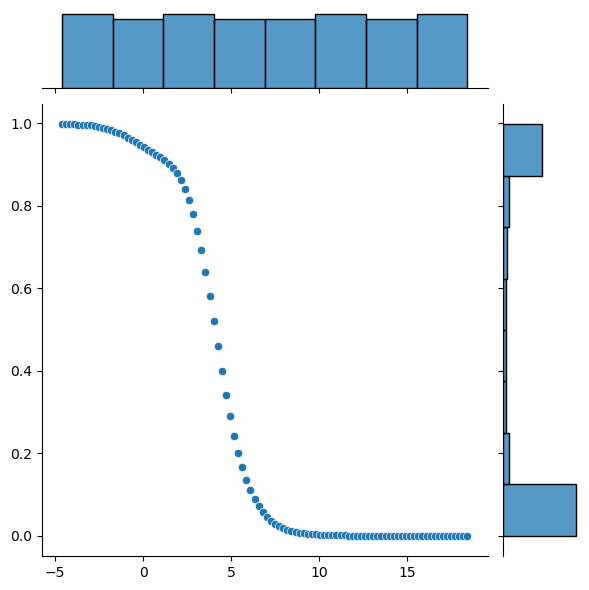

In [71]:
sns.jointplot(x=np.log(param_range),y=test_mean)    #this graph reperesents the r square values wich increase if lambda is increasing until a specefic point where r square starts to decrease until it is equal to zero 

In [72]:
#chercher la valeur maximum de r square:
np.where(test_mean == 0.9734929641394687)

(array([], dtype=int64),)

In [73]:
param_range[0] #this will give us the lambda value for which r square is maximum

0.01

In [74]:
Lm_r_best=Ridge(alpha=param_range[3])

In [75]:
Lm_r_best.fit(X_train_s,y_train)

Ridge(alpha=0.02009233002565047)

In [76]:
r2_score(y_test,Lm_r_best.predict(X_test_s))  #r square on our test data

0.0

In [77]:
r2_score(y_train,Lm_r_best.predict(X_train_s))   #r square on our train data  ::It indicates a very good fit of your regression model to the test data

0.9972334925654724

In [78]:
X = df.drop('Water Quantity (L)', axis=1)  # X représente les caractéristiques utilisées pour la prédiction
predictions = Lm3.predict(x_multi)
y = df['Water Quantity (L)']  # Valeurs cibles
model = LinearRegression()
model.fit(X, y)  # Entraîner le modèle avec les caractéristiques et les valeurs cibles

# Prédire les valeurs basées sur les caractéristiques disponibles dans le DataFrame
predictions = model.predict(X)

# Ajouter les valeurs prédites comme une nouvelle colonne dans le DataFrame
df['Predicted_Quantity'] = predictions


In [79]:
print (df.head())

   Time (hours)  Humidity Level 1 (%)  Humidity Level 2 (%)  \
0           0.0                  80.0                  30.0   
1          12.0                  70.0                  40.0   
2          24.0                  60.0                  50.0   
3          36.0                  50.0                  55.0   
4          48.0                  40.0                  60.0   

   Humidity Level 3 (%)  Temperature Level 1 (Â°C)  Temperature Level 2 (Â°C)  \
0                  20.0                       25.0                       24.0   
1                  30.0                       28.0                       27.0   
2                  40.0                       30.0                       29.0   
3                  45.0                       27.0                       26.0   
4                  50.0                       20.0                       21.0   

   Temperature Level 3 (Â°C)  Water Quantity (L)  Predicted_Quantity  
0                       23.0                40.0           39.6

In [80]:
import joblib

# Enregistrer le modèle dans un fichier
filename = 'linear_regression_model.pkl'
joblib.dump(Lm3, filename)
print(f"Modèle enregistré avec succès dans {filename}")


Modèle enregistré avec succès dans linear_regression_model.pkl


In [81]:
data= pd.read_csv('D:\\souha\\testmodelhumidity.csv', encoding='latin1')

In [82]:
# Suppression des lignes avec des valeurs manquantes
data.dropna(inplace=True)

In [83]:
print(data)

    Time (hours)  Humidity Level 1 (%)  Humidity Level 2 (%)  \
0            0.0                  80.0                  30.0   
1           12.0                  70.0                  40.0   
2           24.0                  60.0                  50.0   
3           36.0                  50.0                  55.0   
4           48.0                  55.0                  60.0   
5            0.0                  78.0                  40.0   
6           12.0                  70.0                  53.0   
7           24.0                  63.0                  55.0   
8           36.0                  58.0                  60.0   
9           48.0                  55.0                  58.0   
10          48.0                  40.0                  55.0   
12           0.0                  80.0                  30.0   
13          24.0                  70.0                  40.0   
14          48.0                  60.0                  50.0   
15          72.0                  50.0  

In [84]:
print(data.dtypes)

Time (hours)                 float64
Humidity Level 1 (%)         float64
Humidity Level 2 (%)         float64
Humidity Level 3 (%)         float64
Temperature Level 1 (Â°C)    float64
Temperature Level 2 (Â°C)    float64
Temperature Level 3 (Â°C)    float64
dtype: object


In [85]:
print(data.dtypes)

Time (hours)                 float64
Humidity Level 1 (%)         float64
Humidity Level 2 (%)         float64
Humidity Level 3 (%)         float64
Temperature Level 1 (Â°C)    float64
Temperature Level 2 (Â°C)    float64
Temperature Level 3 (Â°C)    float64
dtype: object


In [86]:
# Charger le modèle depuis le fichier
loaded_model = joblib.load(filename)

# Utiliser le modèle chargé pour faire des prédictions
data['Predicted_Quantity'] = loaded_model.predict(data)

# Afficher les premières lignes du DataFrame pour vérifier
print(data.head())                             # il y 

   Time (hours)  Humidity Level 1 (%)  Humidity Level 2 (%)  \
0           0.0                  80.0                  30.0   
1          12.0                  70.0                  40.0   
2          24.0                  60.0                  50.0   
3          36.0                  50.0                  55.0   
4          48.0                  55.0                  60.0   

   Humidity Level 3 (%)  Temperature Level 1 (Â°C)  Temperature Level 2 (Â°C)  \
0                  20.0                       25.0                       24.0   
1                  30.0                       28.0                       27.0   
2                  40.0                       30.0                       29.0   
3                  45.0                       27.0                       26.0   
4                  58.0                       20.0                       21.0   

   Temperature Level 3 (Â°C)  Predicted_Quantity  
0                       23.0           39.685552  
1                       26.0    

In [87]:
print(data)

    Time (hours)  Humidity Level 1 (%)  Humidity Level 2 (%)  \
0            0.0                  80.0                  30.0   
1           12.0                  70.0                  40.0   
2           24.0                  60.0                  50.0   
3           36.0                  50.0                  55.0   
4           48.0                  55.0                  60.0   
5            0.0                  78.0                  40.0   
6           12.0                  70.0                  53.0   
7           24.0                  63.0                  55.0   
8           36.0                  58.0                  60.0   
9           48.0                  55.0                  58.0   
10          48.0                  40.0                  55.0   
12           0.0                  80.0                  30.0   
13          24.0                  70.0                  40.0   
14          48.0                  60.0                  50.0   
15          72.0                  50.0  

In [88]:
# Filtrer les données pour n'afficher que les prédictions toutes les 48 heures
df_filtered = df[df['Time (hours)'] % 48 == 0]

# Afficher les résultats filtrés
print(df_filtered[['Time (hours)', 'Predicted_Quantity']])

    Time (hours)  Predicted_Quantity
0            0.0           39.685552
4           48.0           40.000000
6            0.0           39.685552
10          48.0           40.000000
12           0.0           30.373385
14          48.0           29.552585
16          96.0           30.291449


In [ ]:
# Filtrer les données pour n'afficher que les prédictions toutes les 48 heures
df_filtered = df[df['Time (hours)'] % 48 == 0]

# Afficher les résultats filtrés
print(df_filtered[['Time (hours)', 'Predicted_Quantity']])